# 1 - Introduction au Deep Learning avec Keras 


Nous allons √† pr√©sent nous pencher sur un exemple de mod√®le de Perceptron multicouche sur le Dataset bien connu IRIS. 
- Pour rappel, ce jeu de donn√©es est le plus r√©put√© pour des projets de reconnaissance d'esp√®ces. Il contient des informations visuelles sur 3 esp√®ces d'iris d√©crites par 50 observations chacunes.    
L'objectif est donc de reconna√Ætre la fleur d'iris √† partir de certaines mesures caract√©ristiques regroup√©es dans des donn√©es tabulaires.

(a) Ex√©cuter la cellule suivante pour importer les packages n√©c√©ssaires :

In [1]:
import numpy as np # Pour la manipulation de tableaux

import pandas as pd # Pour manipuler des DataFrames pandas

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from tensorflow.keras.layers import Input, Dense #Pour instancier une couche Dense et une d'Input
from tensorflow.keras.models import Model

In [2]:
import tensorflow
tensorflow.__version__  # versions 2.9.1 pour moi et pour eux 2.0.0

'2.18.0'

In [3]:
import tensorflow as tf
import random
import os

def fix_random_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

# Appliquer la seed fix√©e
fix_random_seed(42)

In [ ]:
#lien de la data sur github
url = "https://raw.githubusercontent.com/Fred-Zang/AJC-Deep_Learning_fondamentaux/refs/heads/main/iris.csv"
df = pd.read_csv(url, header=None, skiprows=1)

# sinon iris.csv plac√© sur le dossier de travail faire plutot
# df = pd.read_csv("iris.csv", header=None, skiprows=1)

# d√©finir les bons noms de colonnes
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

print(df.info())
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


sepal_length  sepal_width  petal_length  petal_width  species
73            6.1          2.8           4.7          1.2        1
18            5.7          3.8           1.7          0.3        0
118           7.7          2.6           6.9          2.3        2
78            6.0          2.9           4.5          1.5        1
76            6.8          2.8           4.8          1.4        1
31            5.4          3.4           1.5          0.4        0
64            5.6          2.9           3.6          1.3        1
141           6.9          3.1           5.1          2.3        2
68            6.2          2.2           4.5          1.5        1
82            5.8          2.7           3.9          1.2        1
110           6.5          3.2           5.1          2.0        2
12            4.8          3.0           1.4          0.1        0
36            5.5          3.5           1.3          0.2        0
9             4.9          3.1           1.5          0.1        0
19            5.1          3.8           1.5          0.3        0
56            6.3          3.3           4.7          1.6        1
104           6.5          3.0           5.8          2.2        2
69            5.6          2.5           3.9          1.1        1
55            5.7          2.8           4.5          1.3        1
132           6.4          2.8           5.6          2.2        2

## Graph explicatif

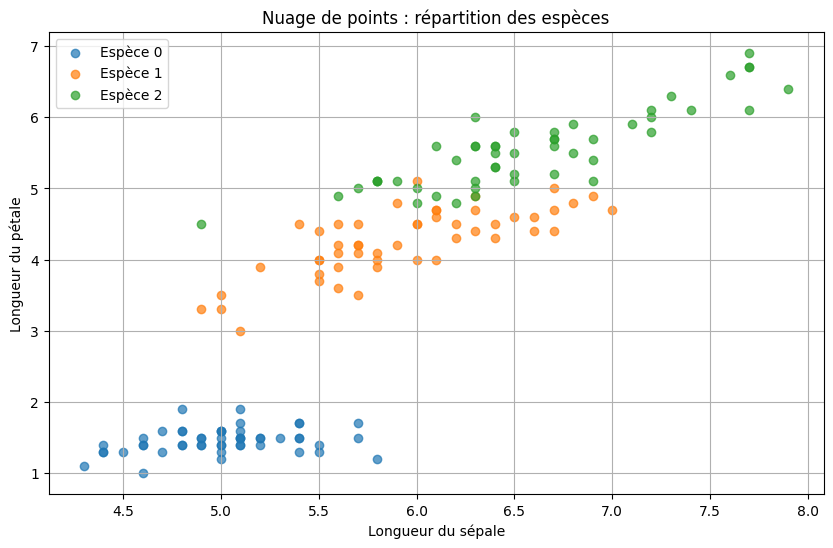

In [5]:
# Cr√©ation du nuage de points
plt.figure(figsize=(10, 6))

# MODIFICATION : boucle pour afficher les 3 classes avec des couleurs diff√©rentes
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(
        subset['sepal_length'],
        subset['petal_length'],
        label=f"Esp√®ce {species}",
        alpha=0.7
    )

plt.xlabel("Longueur du s√©pale")
plt.ylabel("Longueur du p√©tale")
plt.title("Nuage de points : r√©partition des esp√®ces")
plt.legend()
plt.grid(True)
plt.show()

- S√©parer les variables explicatives de la variable cible.


In [6]:
#Splitting the data into training and test test
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values



- (e) S√©parer les donn√©es en un jeu d'entra√Ænement et test. Le jeu de test p√®sera pour un tiers du jeu de donn√©es.

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# <span style="color:orange;">Multi Layer Perceptron</span> MLP ANN

Le mod√®le Perceptron multicouche est une s√©quence de couches Perceptron dont l'entr√©e est la sortie de la couche pr√©c√©dente.

Consid√©rons un <span style="color:green;">mod√®le Perceptron √† 3 couches</span>. Pour un vecteur d'entr√©e donn√©  x , la sortie de la premi√®re couche est :

- H1=Layer1(x)

 
Ensuite, le vecteur  H1H1  est donn√© en entr√©e √† la deuxi√®me couche :

- H2=Layer2(H1)

 
Enfin, le vecteur  H2H2  est donn√© en entr√©e √† la troisi√®me couche pour obtenir la sortie finale du mod√®le :

- O=Layer3(H2)


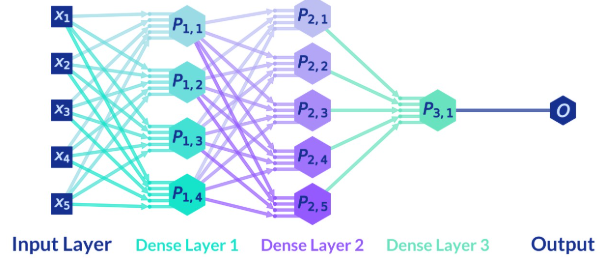

Les perceptrons multicouches peuvent √™tre construits <span style="color:orange;">**sequentiellement**</span> en empilant les couches denses les unes apr√®s les autres. Vous rencontrerez parfois cette √©criture dans Keras, m√™me si dans ce module nous avons d√©cid√© d'utiliser la construction <span style="color:orange;">**fonctionnelle**</span> qui est plus polyvalent et qui s'utilise d'avantage quand on √©crit des mod√®les complexes pouvant avoir une structure non lin√©aire ou prendre diff√©rents inputs.

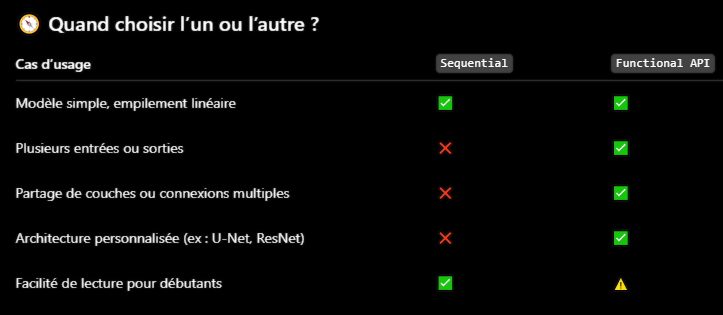

## <span style="color:yellow;">Construction fonctionnelle</span> et Entra√Ænement d'un mod√®le
Nous allons construire notre mod√®le en ajoutant couche par couche depuis la couche d'entr√©e jusqu'√† la couche de sortie.

La construction d'un mod√®le avec Keras se fait tr√®s facilement avec les √©tapes suivantes:

- <span style="color:green;">√âtape 1</span> : Importer les classes Input, Dense et la classe Model de la librairie Keras

- <span style="color:green;">√âtape 2</span> : Instancier une couche d'entr√©e qui contient les dimensions de nos donn√©es en entr√©e

- <span style="color:green;">√âtape 3</span> : Instancier les couches qui composeront le mod√®le avec leur constructeur. 
   
- <span style="color:orange;">d√©clarer Input()</span> sert √† d√©finir la forme attendue des donn√©es d'entr√©e du mod√®le. C'est le point de d√©part de ton r√©seau de neurones.
   - Elle n'effectue aucun calcul, elle sert uniquement √† d√©clarer la structure des donn√©es en entr√©e.
   - shape=(4,) signifie que chaque √©chantillon en entr√©e est un vecteur de 4 valeurs num√©riques : sepal length, sepal width, petal length, petal width

- <span style="color:orange;">d√©clarer les couches denses</span> :  
   - Le **nombre de neurones** dans une couche se d√©finit avec le param√®tre **units**.
   - Chaque couche apprend des repr√©sentations plus abstraites des donn√©es d'entr√©e.
   - En empilant les couches, le mod√®le peut apprendre des relations non lin√©aires et complexes.
   - chaque couche aura un nombre d'unit qui va diminuer : 10 puis 8 puis 6
   - Ces valeurs sont des choix empiriques. Il n‚Äôy a pas de r√®gle absolue, mais quelques principes :
      - Plus d'unit√©s ‚Üí plus de capacit√© d‚Äôapprentissage, mais aussi plus de risque d‚Äôoverfitting.
      - On diminue souvent le nombre d'unit√©s au fur et √† mesure (forme d‚Äôentonnoir vers la sortie).
      - Ici, on commence par 10 (beaucoup de combinaisons possibles), puis tu affines (8, puis 6).

  - <span style="color:orange;">activation="tanh"</span> ?
    - tanh est une fonction d‚Äôactivation non-lin√©aire. Elle transforme les sorties de chaque neurone.
    - Caract√©ristiques de tanh :
        - Sortie comprise entre ‚Äì1 et +1.
        - Centr√©e sur z√©ro (contrairement √† sigmoid).
        - Aide le r√©seau √† apprendre plus vite dans certains cas.
        - Elle est souvent utilis√©e dans les r√©seaux simples ou petits. Pour les gros r√©seaux, on pr√©f√®re parfois ReLU.

- <span style="color:orange;">finir par une couche Dense(units=3, activation="softmax")</span>
   - Pourquoi units = 3 ? car le dataset iris contient 3 classes : setosa, versicolor, virginica
   - Pourquoi activation="softmax" ?
      - softmax est utilis√©e en classification multi-classe. Elle transforme les 3 sorties du r√©seau en probabilit√©s :
      - La somme des 3 sorties est toujours √©gale √† 1.
      - La classe pr√©dite sera celle avec la plus grande probabilit√©.
      - C‚Äôest la meilleure activation pour une sortie multi-classe, combin√©e √† la perte sparse_categorical_crossentropy si tes classes sont encod√©es en entiers (0, 1, 2).


In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# d√©clarer Input()
inputs = Input(shape = (4,), name = "Input")

# d√©clarer les couches denses
dense1 = Dense(units = 10, activation = "tanh", name = "Dense_1")
dense2 = Dense(units = 8, activation = "tanh", name = "Dense_2")
dense3 = Dense(units = 6, activation = "tanh", name = "Dense_3")
dense4 = Dense(units = 3, activation = "softmax", name = "Dense_4") # couche de sortie

- (f) Comme nous sommes dans une construction **fonctionnelle**, il faut appliquer une √† une les diff√©rentes couches du mod√®le en pr√©cisant que la premi√®re couche prendra en entr√©e l'input et l'output correspondra √† l'application de la derniere couche Dense.
- Puis Appliquer les couches une √† une (construction fonctionnelle).
x = dense1(inputs)
x = dense2(x)
...

In [9]:
# Appliquer les couches une √† une (loi de composition)
x=dense1(inputs)
x=dense2(x)
x=dense3(x)
outputs=dense4(x)

- Les commandes suivantes permettent de finaliser la d√©finition du mod√®le et d'en afficher la structure.

In [10]:
# finaliser la d√©finition du mod√®le et afficher sa structure
model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Input (InputLayer)              ‚îÇ (None, 4)              ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_1 (Dense)                 ‚îÇ (None, 10)             ‚îÇ            50 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_2 (Dense)                 ‚îÇ (None, 8)              ‚îÇ            88 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_3 (Dense)                 ‚îÇ (None, 6)              ‚îÇ            54 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_4 (Dense)                 ‚îÇ (None, 3)              ‚îÇ            21 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

## approche S√©quentielle (pour info)

``` python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# MODIFICATION : D√©finir le mod√®le s√©quentiel
model = Sequential(name="Model_sequentiel")

# MODIFICATION : Ajouter les couches dans le m√™me ordre que l'approche fonctionnelle
model.add(Dense(units=10, activation='tanh', input_shape=(4,), name='Dense_1'))
model.add(Dense(units=8, activation='tanh', name='Dense_2'))
model.add(Dense(units=6, activation='tanh', name='Dense_3'))
model.add(Dense(units=3, activation='softmax', name='Dense_4'))

# Afficher le r√©sum√© du mod√®le
model.summary()
```
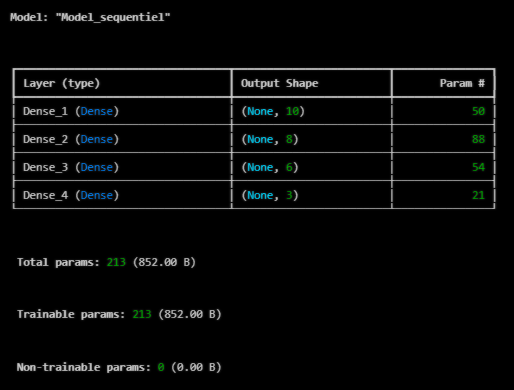

- (g) Compiler le mod√®le, avec comme fonction de perte: **"sparse_categorical_crossentropy"**, adapt√©e √† la classification √† multi-classe. D√©finir l'optimiseur : **"adam"** et la m√©trique : **["accuracy"]**

In [11]:
# pr√©parer le mod√®le pour l'entra√Ænement.
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

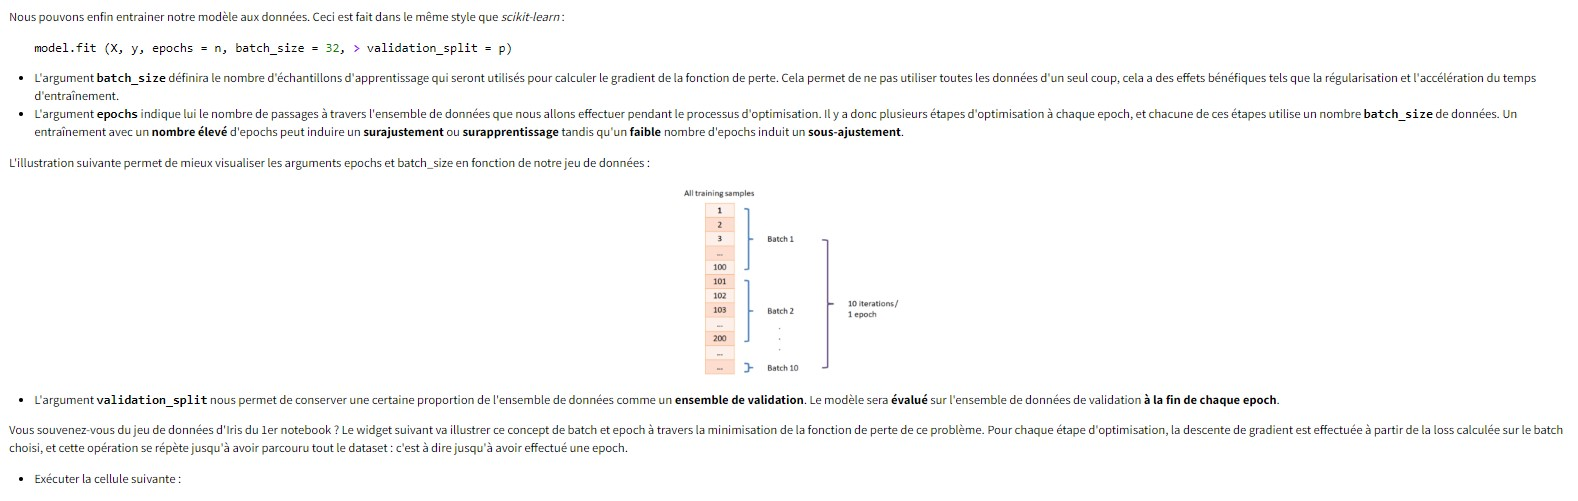

- (h) Entra√Æner le mod√®le sur ¬´X_train¬ª et ¬´y_train¬ª pour les epochs 500 avec une taille de lot de 32 √©chantillons et sur les donn√©es de test.

In [12]:
historic = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/500
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 99ms/step - accuracy: 0.3537 - loss: 1.2037 - val_accuracy: 0.3200 - val_loss: 1.2017
Epoch 2/500
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - accuracy: 0.3537 - loss: 1.1776 - val_accuracy: 0.3200 - val_loss: 1.1783
Epoch 3/500
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - accuracy: 0.3537 - loss: 1.1565 - val_accuracy: 0.3200 - val_loss: 1.1567
Epoch 4/500
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step - accuracy: 0.3537 - loss: 1.1370 - val_accuracy: 0.3200 - val_loss: 1.1361
Epoch 5/500
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - accuracy: 0.3537 - loss: 1.1184 - val_accuracy: 0.3200 - val_loss: 1.1164
Epoch 6/500
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - accuracy: 0.3537 - loss: 1.1007 - val_accuracy: 0.3200 - val_loss: 1.0972
Epoc

# Performances du mod√®le
Nous voulons maintenant effectuer un diagnostic de notre mod√®le. Pour cela, nous allons calculer une matrice de confusion sur l'√©chantillon de test.

N√©anmoins, si nous essayons de pr√©dire la classe de l'√©chantillon de test, la m√©thode **predict* du mod√®le renvoie un **vecteur de probabilit√©s** o√π chaque √©l√©ment est la probabilit√© d'appartenance √† la classe correspondant √† son indice.

Pour utiliser la fonction classification_report du sous-module metrics de scikit-learn, il faut que le vecteur de la pr√©diction et le vecteur de la classe r√©elle soient compos√©s d'entiers.

Nous allons alors utiliser la m√©thode **argmax** d'un array numpy pour savoir √† quelle classe correspondent les vecteurs binaires et les vecteurs de probabilites.

- (a) Pr√©dire les classes de l'√©chantillon **X_test** √† l'aide de la m√©thode predict du mod√®le. Stocker le r√©sultat dans un tableau nomm√© **test_pred**.
- (b) Appliquer la m√©thode argmax sur les tableaux **test_pred** pour obtenir des vecteurs d'entiers correspondant aux classes pr√©dites et r√©elles. Il faudra passer l'argument 'axis = 1' pour que l'argmax soit calcul√©e sur les colonnes et non les lignes. Stocker les sorties des appels de la m√©thode argmax dans un tableau nomm√©s **test_pred_class** et les valeurs r√©elles dans **y_test_class**.

In [13]:
test_pred = model.predict(X_test)


y_test_class = y_test
y_pred_class = np.argmax(test_pred,axis=1)

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step 


- (c) Afficher un compte-rendu √©valuatif d√©taill√© de la perfomance du mod√®le gr√¢ce √† la fonction classification_report du sous-module metrics de scikit-learn.

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


## Graph des performances

In [15]:
# recherche des cl√©s de historic pour notre graphe
print(historic.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


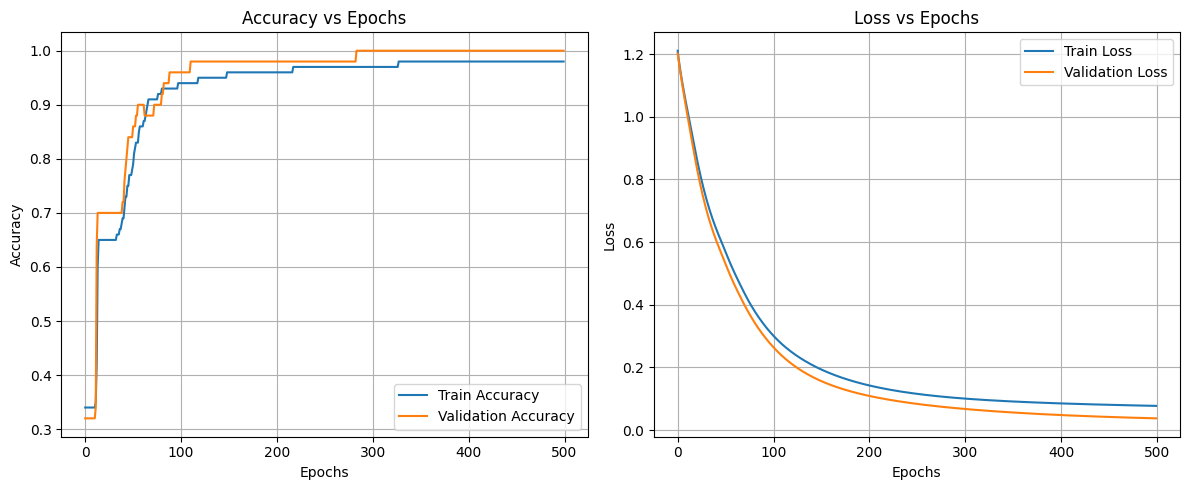

In [16]:
import matplotlib.pyplot as plt


# Tracer les courbes d'accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(historic.history["accuracy"], label="Train Accuracy")
plt.plot(historic.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.grid(True)

# Tracer les courbes de perte
plt.subplot(1, 2, 2)
plt.plot(historic.history["loss"], label="Train Loss")
plt.plot(historic.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Analyse des performances

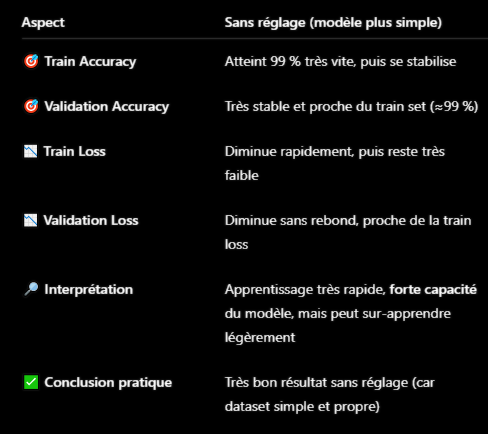

## Test plus complet avec dropout() et EarlyStopping()

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# üì• Chargement des donn√©es
df = pd.read_csv("iris.csv", header=None, skiprows=1)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# üß† D√©finition du mod√®le r√©gularis√©
# moins de neurones en couches => moins de poids √† apprendre
# dropout() = technique de r√©gularisation : d√©sactive al√©atoirement x‚ÄØ% des neurones d'une couche
            # Le r√©seau n‚Äôa pas acc√®s √† 100‚ÄØ% de sa m√©moire √† chaque passe.
            # Cela l‚Äôemp√™che de se reposer trop sur certains neurones.
            # Il doit mieux r√©partir l‚Äôapprentissage dans tout le r√©seau.
            # Cela r√©duit la variance, donc √©vite le surapprentissage.
            
inputs = Input(shape=(4,), name="Input")
x = Dense(8, activation="tanh", name="Dense_1")(inputs) # 1er couche avec 8 neurones au lieu de 10
x = Dropout(0.2, name="Dropout_1")(x) # d√©activer 20% de la couche pr√©c√©dente
x = Dense(6, activation="tanh", name="Dense_2")(x)  # 2eme couche avec 6 neurones au lieu de 8 (on a √©limin√© en effet la 1ere couche √† 10 neurones d'avant)
x = Dropout(0.2, name="Dropout_2")(x) # d√©activer 20% de la couche pr√©c√©dente
outputs = Dense(3, activation="softmax", name="Output")(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

# ‚öôÔ∏è Compilation
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# ‚è±Ô∏è Callback pour early stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# üöÄ Entra√Ænement
historic = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=2 # √©vite le tremblement de cellule jupyter quand le fit est lanc√© sur les epochs -> Affichage clair, 1 ligne par epoch, sans animation"
)


Model: "functional_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Input (InputLayer)              ‚îÇ (None, 4)              ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_1 (Dense)                 ‚îÇ (None, 8)              ‚îÇ            40 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_1 (Dropout)             ‚îÇ (None, 8)              ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dense_2 (Dense)                 ‚îÇ (None, 6)              ‚îÇ            54 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Dropout_2 (Dropout)             ‚îÇ (None, 6)              ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Output (Dense)                  ‚îÇ (None, 3)              ‚îÇ            21 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
7/7 - 2s - 234ms/step - accuracy: 0.3200 - loss: 1.5431 - val_accuracy: 0.3800 - val_loss: 1.3104
Epoch 2/500
7/7 - 0s - 13ms/step - accuracy: 0.3000 - loss: 1.3849 - val_accuracy: 0.3800 - val_loss: 1.2671
Epoch 3/500
7/7 - 0s - 11ms/step - accuracy: 0.3300 - loss: 1.3627 - val_accuracy: 0.3800 - val_loss: 1.2279
Epoch 4/500
7/7 - 0s - 12ms/step - accuracy: 0.3000 - loss: 1.2846 - val_accuracy: 0.3800 - val_loss: 1.1912
Epoch 5/500
7/7 - 0s - 11ms/step - accuracy: 0.3000 - loss: 1.3220 - val_accuracy: 0.3800 - val_loss: 1.1572
Epoch 6/500
7/7 - 0s - 11ms/step - accuracy: 0.3100 - loss: 1.3017 - val_accuracy: 0.3800 - val_loss: 1.1255
Epoch 7/500
7/7 - 0s - 11ms/step - accuracy: 0.3300 - loss: 1.2236 - val_accuracy: 0.3800 - val_loss: 1.0946
Epoch 8/500
7/7 - 0s - 10ms/step - accuracy: 0.4400 - loss: 1.1487 - val_accuracy: 0.3800 - val_loss: 1.0678
Epoch 9/500
7/7 - 0s - 11ms/step - accuracy: 0.3600 - loss: 1.1859 - val_accuracy: 0.3800 - val_loss: 1.0440
Epoch 10/500
7/7 -

In [18]:
# performances du mod√®le
test_pred = model.predict(X_test)


y_test_class = y_test
y_pred_class = np.argmax(test_pred,axis=1)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


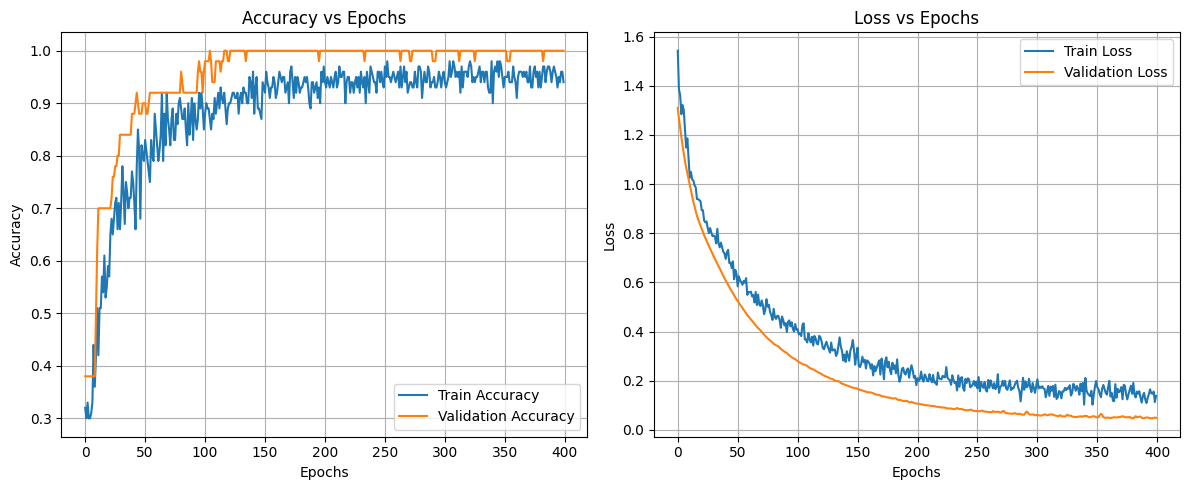

In [19]:
import matplotlib.pyplot as plt

# Tracer les courbes d'accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(historic.history["accuracy"], label="Train Accuracy")
plt.plot(historic.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.grid(True)

# Tracer les courbes de perte
plt.subplot(1, 2, 2)
plt.plot(historic.history["loss"], label="Train Loss")
plt.plot(historic.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


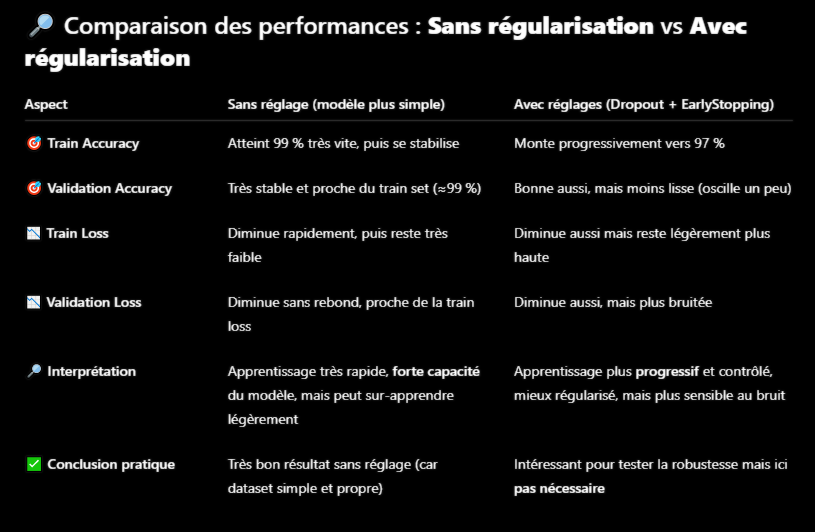
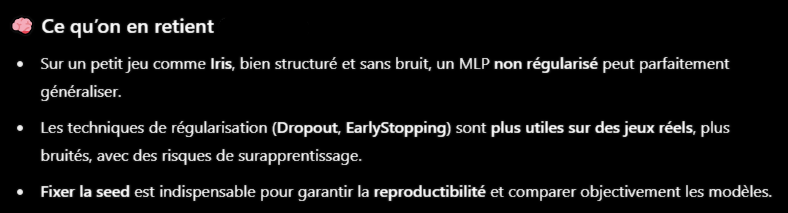